<a href="https://colab.research.google.com/github/NikhilGurrapu/Calculating-m-and-b-using-Gradient-Descent/blob/main/Calculating_m_and_b_using_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required Libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Making a toy data

In [47]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=3)

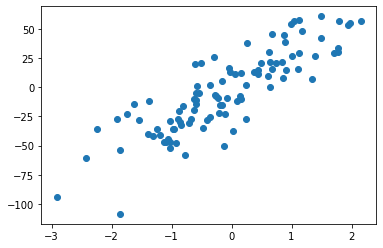

In [48]:
plt.scatter(X,y)

# Splitting train and test set

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=3)

# Building LinearRegression Model

In [50]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.7725336605372812

In [51]:
print("m: ",lr.coef_[0],"\nb: ",lr.intercept_)

m:  28.333181031058288 
b:  -0.9650052010683585


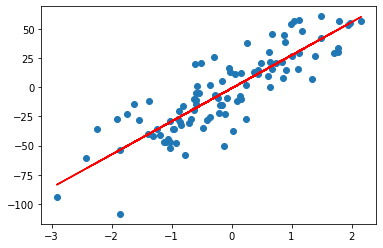

In [52]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')

# Building own Gradient Descent Regression class

In [53]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.m=1
    self.b=0
    self.lr=learning_rate
    self.epochs=epochs
  
  def fit(self,X,y):
    #Calculating m and b using GD
    for i in range(self.epochs):
      loss_slope_m=-2*np.sum((y-self.m*X.ravel() -self.b)*X.ravel())
      loss_slope_b=-2*np.sum(y-self.m*X.ravel() -self.b)

      self.m=self.m-(self.lr*loss_slope_m)
      self.b=self.b-(self.lr*loss_slope_b)
      
    print("m: ",self.m,"\nb: ",self.b)
  
  def predict(self,X):
    return self.m * X + self.b

In [62]:
gd = GDRegressor(0.01,65)

In [63]:
gd.fit(X_train,y_train)

m:  28.333209713744935 
b:  -0.9650253689354078


In [64]:
y_pred = gd.predict(X_test)
r2_score(y_test,y_pred)

0.7725335268502368

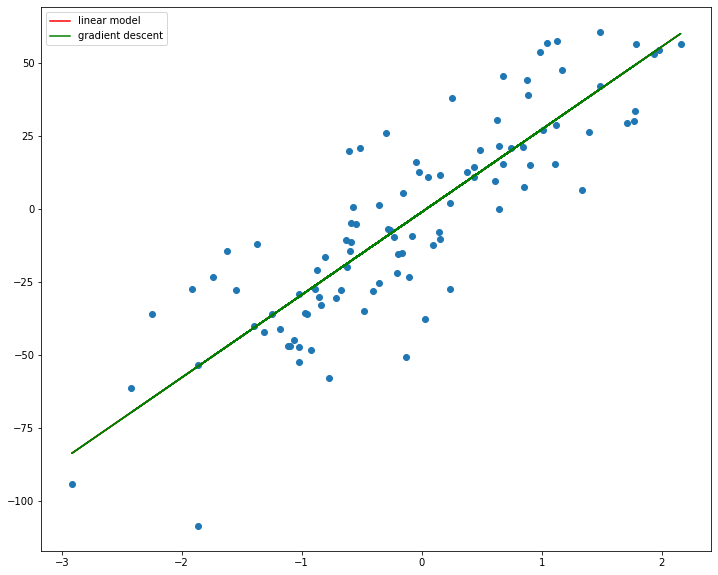

In [69]:
plt.figure(figsize=(12,10))
plt.scatter(X,y)
plt.plot(X_train,lr.predict(X_train),color='red',label='linear model')
plt.plot(X_train,gd.predict(X_train),color='green',label='gradient descent')
plt.legend()
plt.show()

## The Gradient Descent Regressor class generates values for 'm' and 'b' that closely resemble those produced by the Linear Regressor model, and the 'r2_score' is also identical. Consequently, the line generated by the Gradient Descent Regressor coincides with that of the Linear Regressor model.